In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from chunk_pipeline import order_imbalance_calc
import warnings
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
ts_df = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/2018/acf_pacf.csv")

In [3]:
ts_df_time = ts_df.groupby(['delta', 'Lag'])[['ACF', 'PACF']].agg(['mean', 'std'])

In [7]:
timeframe = '10min'

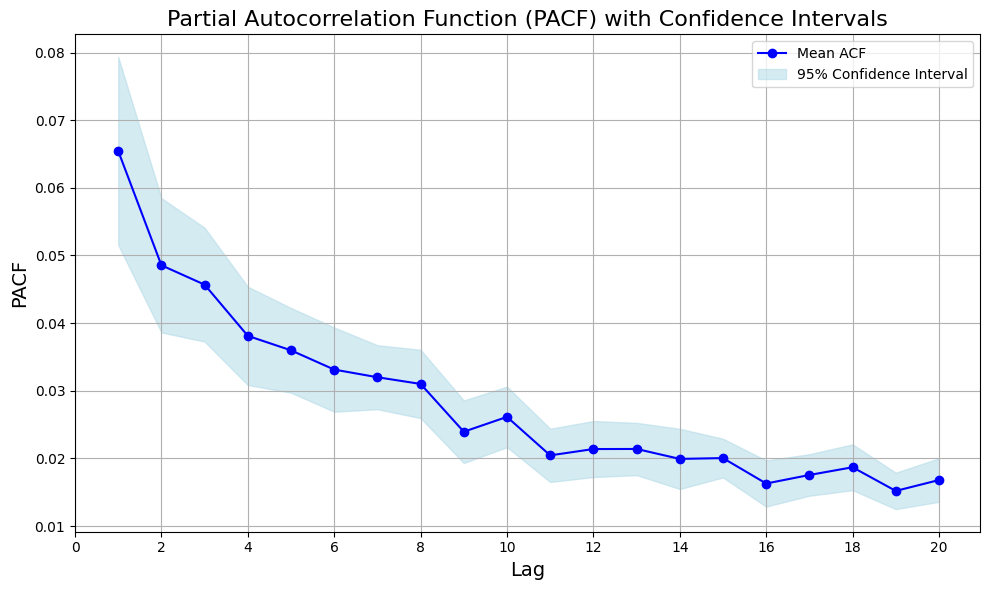

In [8]:
means = ts_df_time.loc[f'{timeframe}', 'PACF']['mean'][1:].to_list()
std_devs = ts_df_time.loc[f'{timeframe}', 'PACF']['std'][1:].to_list()
lags = ts_df_time.loc[f'{timeframe}', 'PACF'][1:].index


# Adjusting standard deviations by dividing by sqrt(20)
adjusted_std_devs = [std / np.sqrt(20) for std in std_devs]

# Recalculating 95% confidence intervals
adjusted_conf_intervals_upper = [mean + 1.96 * adj_std for mean, adj_std in zip(means, adjusted_std_devs)]
adjusted_conf_intervals_lower = [mean - 1.96 * adj_std for mean, adj_std in zip(means, adjusted_std_devs)]

# Plotting the ACF with adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(lags, means, color='blue', linestyle='-', marker='o', label='Mean ACF')
plt.fill_between(lags, adjusted_conf_intervals_lower, adjusted_conf_intervals_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')
plt.title('Partial Autocorrelation Function (PACF) with Confidence Intervals', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(0, max(lags) + 1, 2))
plt.legend()
plt.tight_layout()

plt.show()